In [1]:
pip install pycaret --user


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.ensemble as ske
import sklearn.linear_model as skl
import sklearn.model_selection as skm


In [3]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import jinja2
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Dicionario de Variaveis

AtBat -> Numero de vezes que um rebatedor acertou a bola no bastão

Hits -> Numero de rebatidas dentro da area permitida

HmRun -> Numero de Home Runs acertados por rebatedor

RBI -> Numero de corridas efetivas graças a rebatida

Walks -> Numero de caminhadas do rebatedor

Years -> Numero de anos na liga major

CAtBat -> Numero de vezes que jogou como rebatedor

CHits -> Numero de Hits durante a carreira

CHmRun -> Numero de Home runs feitos durante a carreira

CRuns -> Numero de corridas durante a carreira

CRBI -> Numero de RBI durante a carreira

CWalks -> Numero de walks durante a carreira

League -> Fator dado pela liga onde o jogador joga podendo ser a
Americana ou a Nacional

Division -> Fator dado pela região da liga aonde o jogador joga sendo West e East pois na epoca não existia a liga South

PutOuts -> Numero de vezes que o jogador como defensor eliminou um rebatedor

Assists -> Numero de vezes que um jogador da defesa ajudou a eliminar um rebatedor

Errors -> Numero de vezes que um jogador cometeu um erro na defesa

Salary -> Salario do jogador

NewLeague -> Variavel sobre a liga do jogador no ínicio do ano de 1987

Runs -> Numero de corridas feitas pelo jogador

#Lendo Os Dados

In [6]:
url = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'
df = pd.read_csv(url, index_col = 0)

#Limpeza dos dados

In [7]:
df.isnull().sum()
df = df.dropna()

In [8]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


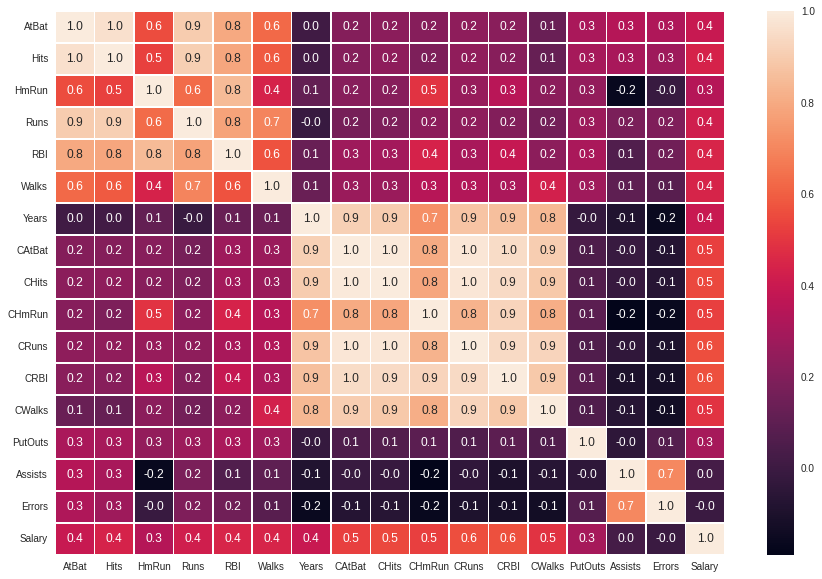

In [9]:
correlation = (df.corr())
plt.figure(figsize=(15,10))
plot_cor = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot_cor


In [10]:
df.groupby(["NewLeague"])["RBI"].describe()

,count,mean,std,min,25%,50%,75%,max
NewLeague,,,,,,,,
A,141.0,54.93617,27.532893,3.0,33.0,50.0,74.0,121.0
N,122.0,47.50000,23.314682,0.0,29.0,43.0,61.0,116.0


In [11]:
df = df.drop(columns=['Salary', 'Errors', 'League','PutOuts','PutOuts', 'Division','Assists','AtBat','Runs'])

<Figure size 864x432 with 0 Axes>

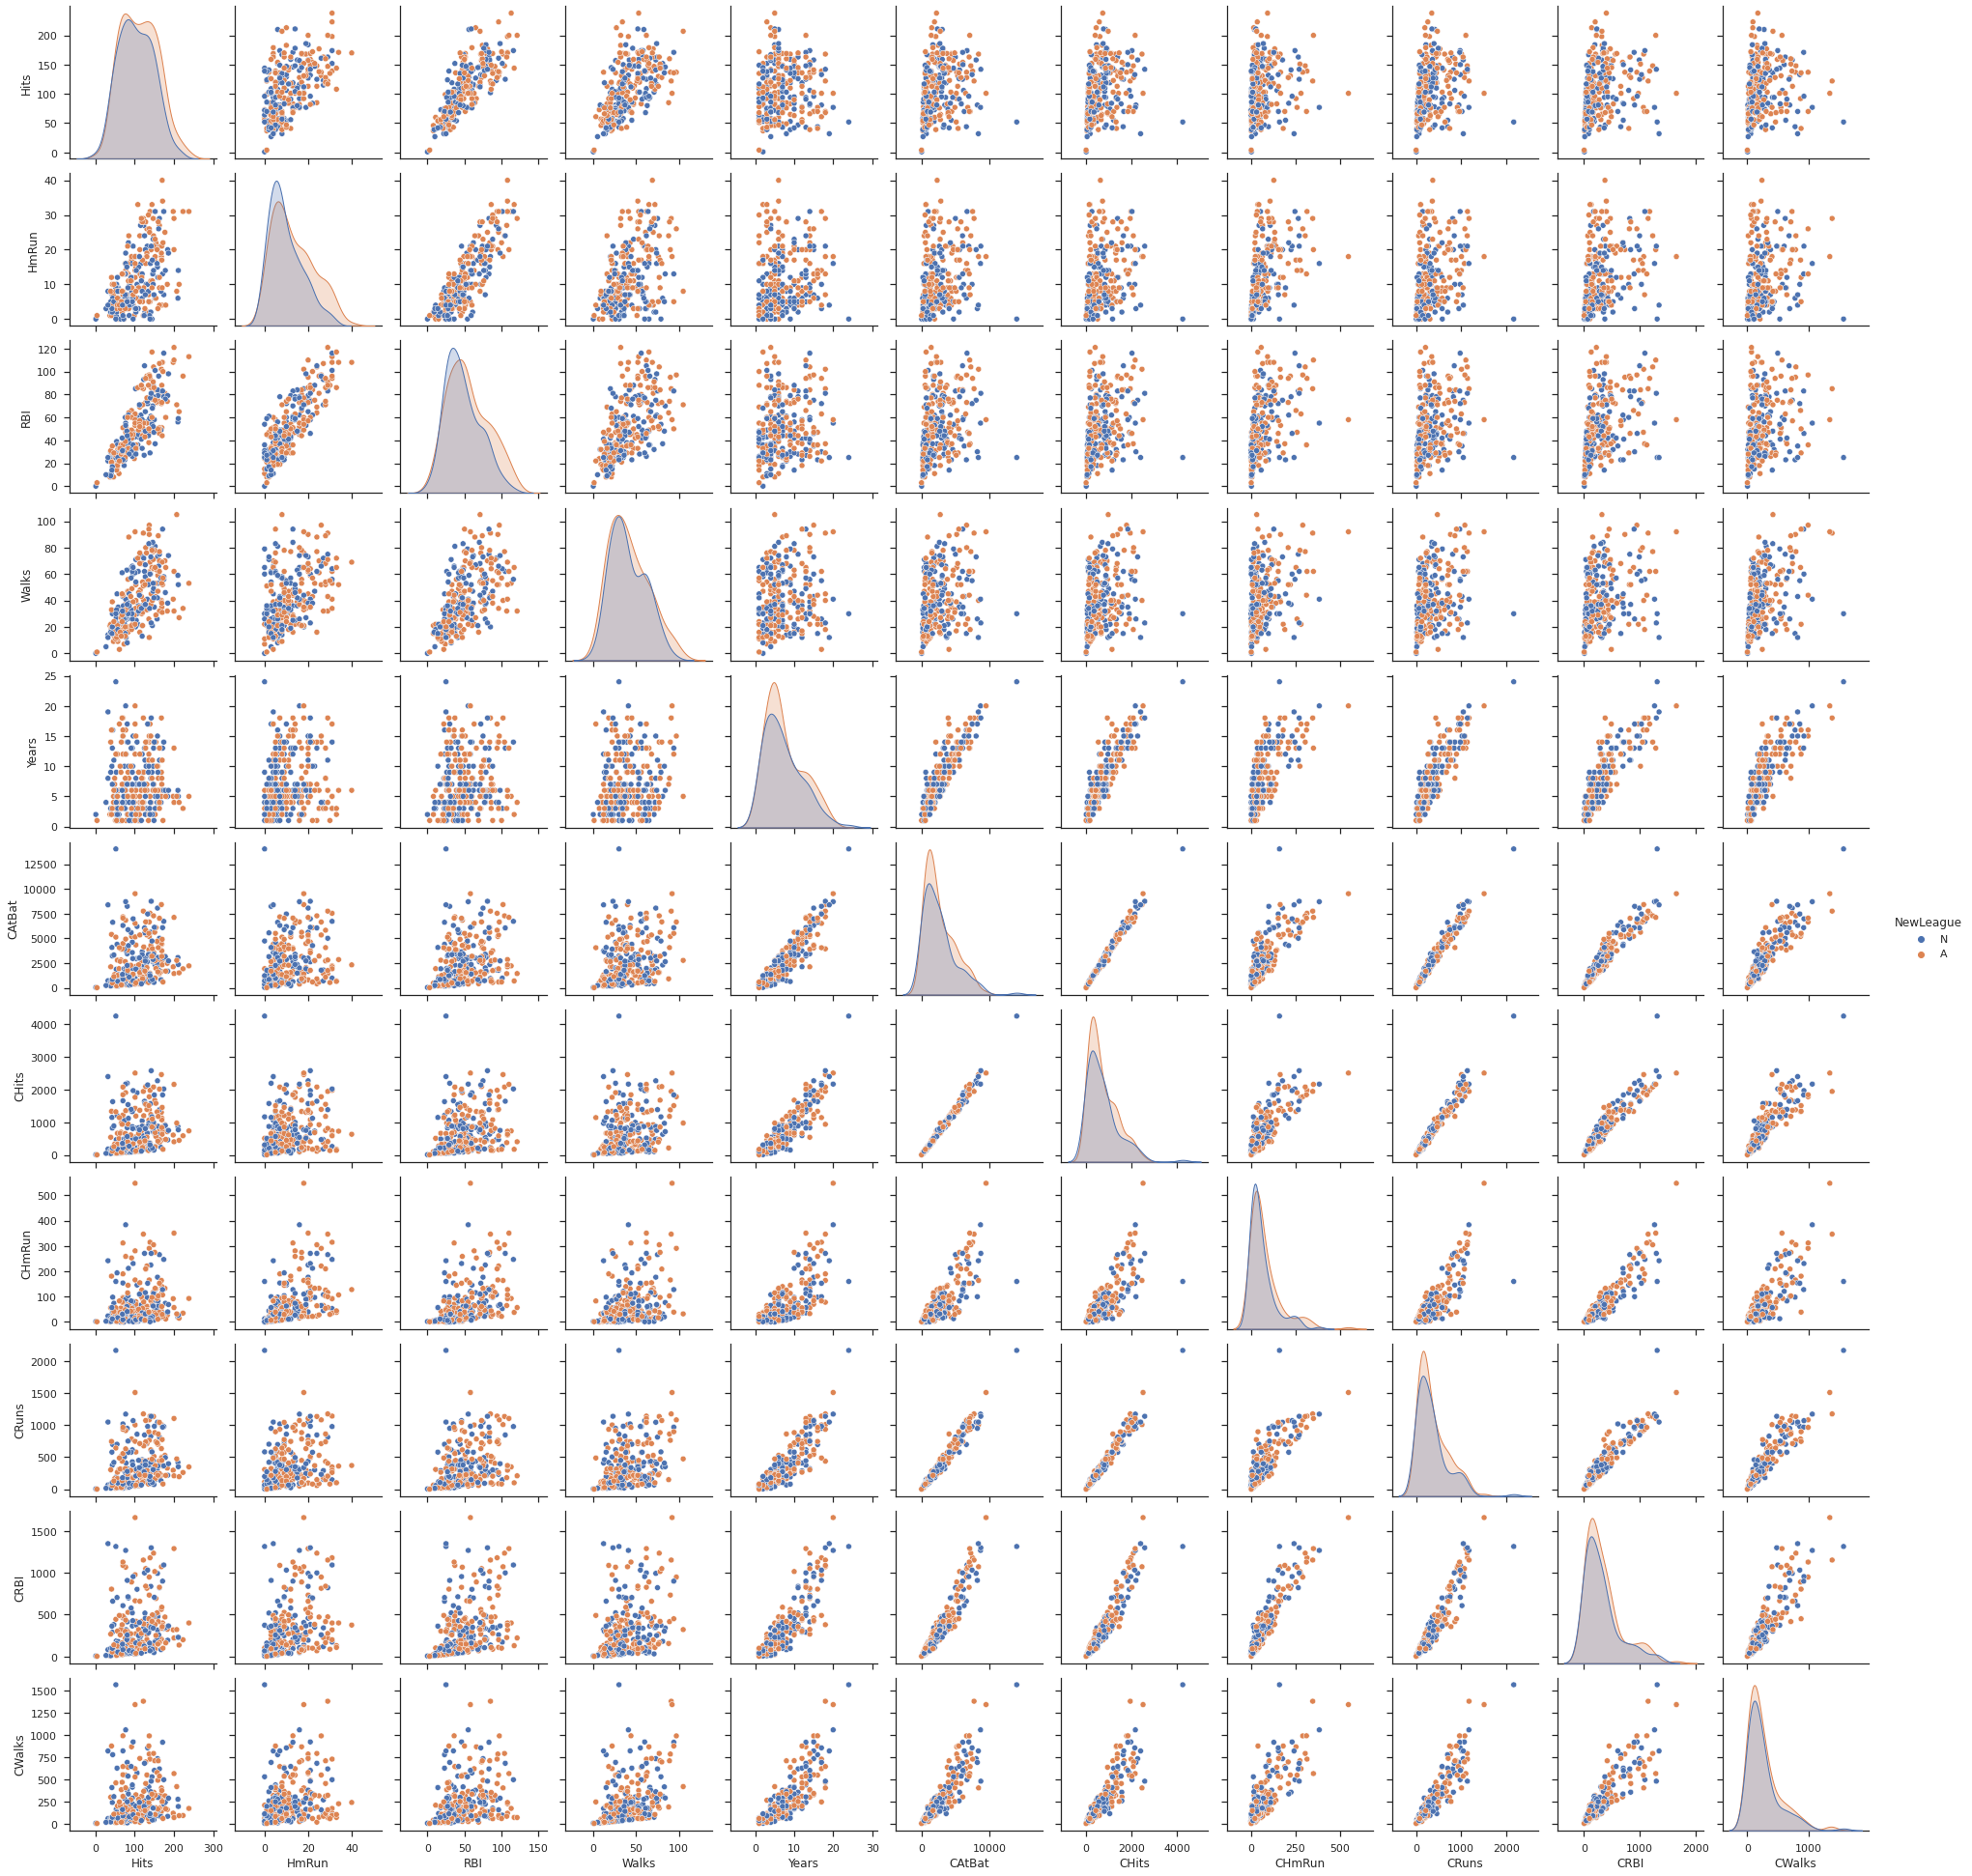

In [12]:
plt.figure(figsize=(12,6))
sns.set_theme(style="ticks")

sns.pairplot(df, hue="NewLeague")
plt.show()

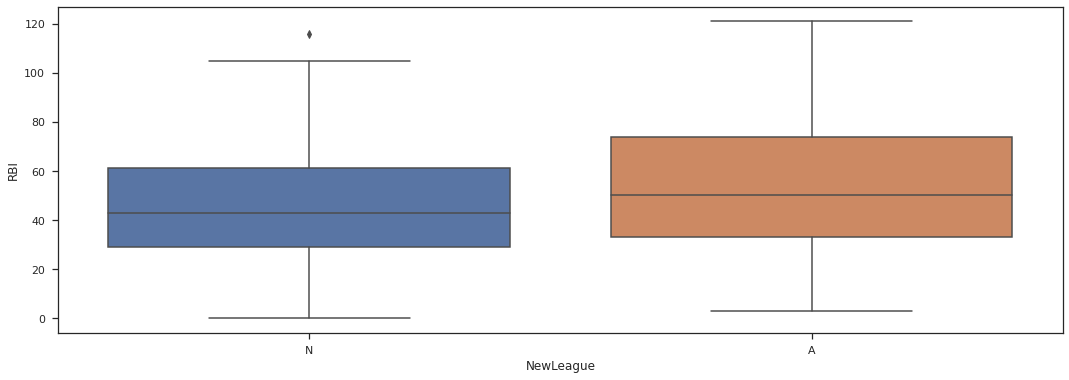

In [13]:
plt.figure(figsize=(18,6))

g = sns.boxplot(x='NewLeague',
                y = 'RBI',
                data = df)

g.set_xlabel('NewLeague')
g.set_ylabel('RBI')
plt.show()

<Figure size 864x432 with 0 Axes>

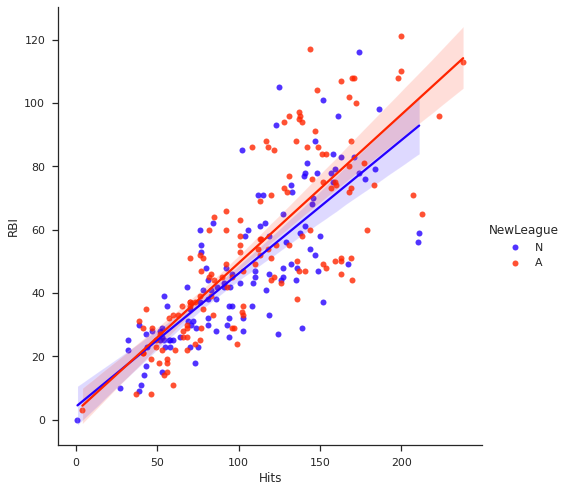

In [14]:
plt.figure(figsize=(12,6))

g = sns.lmplot(x="Hits",
               y="RBI",
               hue="NewLeague",
               height=7,
               data=df,
               palette=['#2500ff','#ff2500'])
g.set_xlabels('Hits')
g.set_ylabels('RBI')

plt.show()

# Regressão utilizando modelos paramétricos

In [15]:
numeric_features = ['Hits','HmRun','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks']

df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.mean()) / x.std())

cat_f = ['NewLeague_A',	'NewLeague_N']

In [16]:
df = pd.get_dummies(df)
df.head()

,Hits,HmRun,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,NewLeague_A,NewLeague_N
-Alan Ashby,-0.594542,-0.527545,-0.521069,-0.097342,1.395233,0.346131,0.174042,-0.002914,-0.121439,0.258473,0.434506,0,1
-Alvin Davis,0.491323,0.728577,0.792549,1.606310,-0.899485,-0.452004,-0.409112,-0.075909,-0.414315,-0.199211,0.010353,1,0
-Andre Dawson,0.735088,0.956963,1.024364,-0.189431,0.769401,1.299081,1.315665,1.894952,1.409364,1.569674,0.354977,0,1
-Andres Galarraga,-0.461579,-0.184967,-0.366526,-0.511743,-1.108096,-0.989050,-0.958326,-0.696365,-0.945718,-0.879551,-0.860675,0,1
-Alfredo Griffin,1.355583,-0.870124,-0.018804,-0.281520,0.769401,0.765534,0.633776,-0.611205,0.422041,0.017261,-0.250955,1,0


In [17]:
X = df.drop(['RBI'], axis=1)
y = df['RBI']


Cross-Validation (Ridge E Lasso)

In [18]:
# metodo de avaliação do modelo
cv = skm.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# modelo de ridge 
model = skl.RidgeCV(alphas=np.arange(0, 1, 0.001), cv=cv, scoring='neg_mean_absolute_error')
# ajuste do modelo
model.fit(X, y)
print('alpha: %f' % model.alpha_)

alpha: 0.365000


In [19]:
# metodo de avaliação do modelo
cv = skm.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# modelo de Lasso
model = skl.LassoCV(alphas=np.arange(0, 1, 0.001), cv=cv, n_jobs=-1)
# ajuste do modelo
model.fit(X, y)
print('alpha: %f' % model.alpha_)

alpha: 0.003000


Testes de Regressão Linear, Lasso e Ridge.

In [20]:
X_train, X_test, y_train, y_test = skm.train_test_split(X,df['RBI'], test_size=0.3, random_state=0)

In [21]:
lr = skl.LinearRegression().fit(X_train, y_train)
lr_lasso = skl.Lasso(alpha=0.003).fit(X_train, y_train)
lr_ridge = skl.Ridge(alpha=0.365).fit(X_train, y_train)

In [22]:
model_list = [lr, lr_lasso, lr_ridge]
models = ['Linear Regression', 'Lasso', 'Ridge']

coefs = []
for model in model_list:
    coefs.append(model.coef_)

coefs = pd.DataFrame(coefs, columns=X.columns, index=models)

coefs

,Hits,HmRun,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,NewLeague_A,NewLeague_N
Linear Regression,0.429006,0.556306,0.108066,0.107773,0.344660,-1.428737,-0.618260,0.302576,1.454020,-0.247810,-0.004295,0.004295
Lasso,0.416520,0.544151,0.100699,0.070346,-0.000000,-0.276876,-0.199302,-0.165593,0.689756,-0.132386,0.000000,-0.000000
Ridge,0.419913,0.551300,0.110843,0.108267,0.039134,-0.611874,-0.365439,-0.037279,0.997854,-0.174333,0.001382,-0.001382


Resultados

In [23]:
mse = []
rmse = []

for model in model_list:
    mse.append(np.mean((y_test - model.predict(X_test))**2))
    rmse.append(np.sqrt(mse[-1]))

tb = pd.DataFrame({ 'MSE': mse, 'RMSE': rmse}, index=models)

# highlight the minimum of each column
tb.style.background_gradient(cmap='RdYlGn')



,MSE,RMSE
Linear Regression,0.153774,0.392140
Lasso,0.132292,0.363720
Ridge,0.140005,0.374173


# Regressão utilizando modelos não-paramétricos

Separando os dados em treino e teste

In [24]:
from sklearn.model_selection import train_test_split
y = df['RBI']
X = df.loc[:, df.columns != 'RBI']

# Separa em treino e teste mantendo a proporção de cada classe na base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [25]:
X_train["RBI"] = y_train.values 
from pycaret.regression import *
s = setup(X_train, target = "RBI",
            numeric_imputation = "median",
            normalize = True,
            fold = 10,
            silent = True,
            session_id = 333)

,Description,Value
0,session_id,333
1,Target,RBI
2,Original Data,"(197, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(137, 11)"


In [26]:
compare_models(exclude = ['omp','huber','en','et','llar','dummy','par','ada','gbr','br','lar'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2534,0.1012,0.3131,0.8910,0.1752,1.2886,0.296
ridge,Ridge Regression,0.2615,0.1057,0.3184,0.8857,0.1726,1.2516,0.012
rf,Random Forest Regressor,0.3156,0.1708,0.4069,0.8179,0.2135,1.2109,0.416
lightgbm,Light Gradient Boosting Machine,0.3493,0.2156,0.4587,0.7673,0.2212,1.2717,0.057
knn,K Neighbors Regressor,0.3948,0.2455,0.4846,0.7358,0.2447,1.4873,0.060
dt,Decision Tree Regressor,0.4349,0.3429,0.5708,0.6459,0.2883,2.0905,0.013
lasso,Lasso Regression,0.8437,1.0805,1.0320,-0.0871,0.6206,0.9902,0.013


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

**Decision Tree** \
>Criamos o modelo e utilizamos o tune_model para determinar os melhores parâmetros.

In [27]:
dtree = create_model("dt")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2539,0.1808,0.4252,0.7394,0.1579,0.3832
1,0.3974,0.2567,0.5067,0.8126,0.2600,2.5501
2,0.5464,0.4291,0.6550,0.3259,0.2891,2.6120
3,0.3312,0.1531,0.3913,0.8449,0.2001,1.1396
4,0.3505,0.1620,0.4024,0.7996,0.2183,1.0815
5,0.5133,0.6382,0.7989,0.5452,0.3777,0.6307
6,0.4885,0.4136,0.6431,0.5840,0.3663,1.4320
7,0.5023,0.3637,0.6030,0.6518,0.3477,4.6008
8,0.5052,0.5059,0.7113,0.4364,0.4031,5.5426


In [28]:
dtree = tune_model(dtree)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2870,0.1428,0.3779,0.7942,0.1383,0.7259
1,0.3422,0.1513,0.3890,0.8896,0.2082,2.2458
2,0.4540,0.2632,0.5131,0.5865,0.2255,2.2199
3,0.3063,0.1495,0.3866,0.8485,0.1875,0.8701
4,0.3795,0.2012,0.4486,0.7510,0.2429,1.4372
5,0.2787,0.1372,0.3704,0.9023,0.1801,0.4058
6,0.3670,0.2371,0.4869,0.7615,0.2315,0.7761
7,0.3953,0.2710,0.5206,0.7404,0.2913,1.3730
8,0.5112,0.4079,0.6386,0.5456,0.3541,1.9065


In [29]:
dtree.get_params() 

{'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': 12,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0002,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 333,
 'splitter': 'best'}

Em seguida temos o grafico de feature importance.


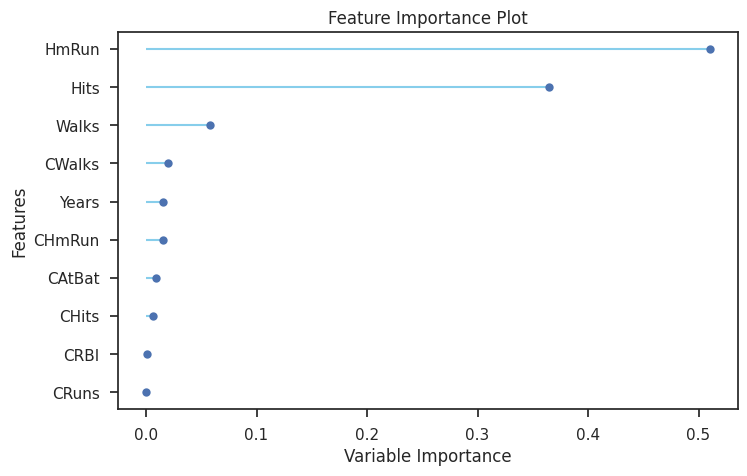

In [30]:
plot_model(dtree,plot = "feature")

**Random Forest** \
>Criamos o modelo e utilizamos o tune_model para determinar os melhores parâmetros.

In [31]:
rf = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1715,0.0661,0.2571,0.9047,0.1685,0.3260
1,0.3160,0.1382,0.3717,0.8992,0.1939,1.9593
2,0.4122,0.2113,0.4597,0.6680,0.1803,1.4503
3,0.3040,0.1413,0.3758,0.8569,0.1611,0.9566
4,0.2948,0.1473,0.3838,0.8178,0.2338,0.5249
5,0.2671,0.1482,0.3850,0.8944,0.1556,0.3014
6,0.3357,0.1837,0.4287,0.8152,0.2605,0.7955
7,0.3911,0.1992,0.4463,0.8093,0.2705,3.1842
8,0.3798,0.3107,0.5574,0.6539,0.3218,2.2494


In [32]:
rf=tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1830,0.0908,0.3013,0.8692,0.1231,0.3585
1,0.3785,0.2273,0.4768,0.8341,0.2184,1.6157
2,0.4324,0.2369,0.4867,0.6279,0.2121,1.5217
3,0.2378,0.1218,0.3491,0.8765,0.1467,0.6067
4,0.3339,0.1938,0.4403,0.7601,0.2343,0.5183
5,0.2765,0.1510,0.3886,0.8924,0.1535,0.2627
6,0.4096,0.2521,0.5021,0.7464,0.2571,0.7498
7,0.4124,0.2403,0.4902,0.7699,0.2746,2.8978
8,0.4180,0.3155,0.5617,0.6485,0.3244,1.6833


In [33]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.02,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 333,
 'verbose': 0,
 'warm_start': False}

Em seguida temos o grafico de feature importance.




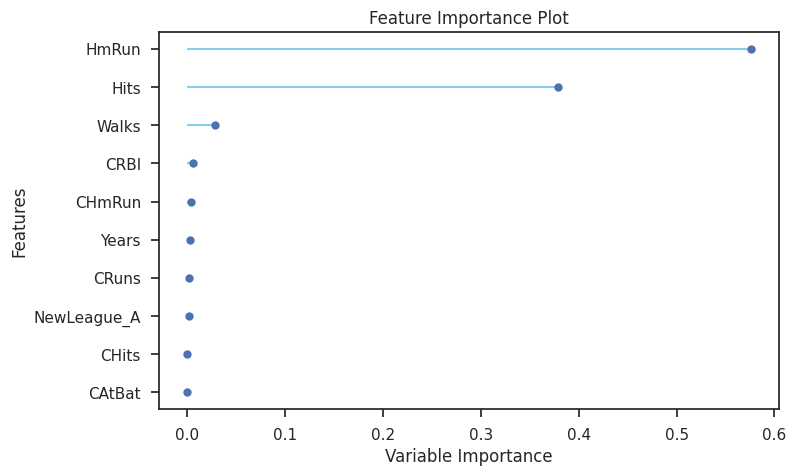

In [34]:
plot_model(rf,plot = "feature")

**Gradient Boosting Regressor** \
>Criamos o modelo e utilizamos o tune_model para determinar os melhores parâmetros.




In [35]:
boosting=create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3124,0.1518,0.3897,0.7812,0.1892,0.5803
1,0.3039,0.1957,0.4424,0.8571,0.2145,1.0282
2,0.4231,0.2805,0.5296,0.5594,0.2195,1.2538
3,0.2829,0.1404,0.3747,0.8577,0.1605,1.0939
4,0.3464,0.1896,0.4354,0.7654,0.2028,1.1608
5,0.2938,0.1801,0.4244,0.8717,0.1660,0.2886
6,0.3367,0.1549,0.3935,0.8442,0.2438,0.8041
7,0.3795,0.2188,0.4678,0.7904,0.2707,2.6060
8,0.4497,0.3895,0.6241,0.5661,0.3550,3.3569


In [36]:
boosting=tune_model(boosting)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2701,0.1050,0.3241,0.8487,0.1795,0.5458
1,0.3222,0.2006,0.4479,0.8536,0.1800,0.6510
2,0.4636,0.2729,0.5224,0.5712,0.2126,1.6861
3,0.2695,0.1694,0.4116,0.8284,0.1850,1.0189
4,0.4282,0.2651,0.5149,0.6719,0.2674,2.0175
5,0.4412,0.3471,0.5891,0.7527,0.2456,0.4773
6,0.3027,0.1308,0.3616,0.8685,0.1988,0.5981
7,0.4062,0.2573,0.5072,0.7537,0.2908,2.3037
8,0.4910,0.4194,0.6476,0.5328,0.3688,3.7597


In [37]:
boosting.get_params()

{'bagging_fraction': 0.5,
 'bagging_freq': 1,
 'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'feature_fraction': 0.5,
 'importance_type': 'split',
 'learning_rate': 0.2,
 'max_depth': -1,
 'min_child_samples': 21,
 'min_child_weight': 0.001,
 'min_split_gain': 0.6,
 'n_estimators': 110,
 'n_jobs': -1,
 'num_leaves': 10,
 'objective': None,
 'random_state': 333,
 'reg_alpha': 0.0005,
 'reg_lambda': 10,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Em seguida temos o grafico de feature importance.


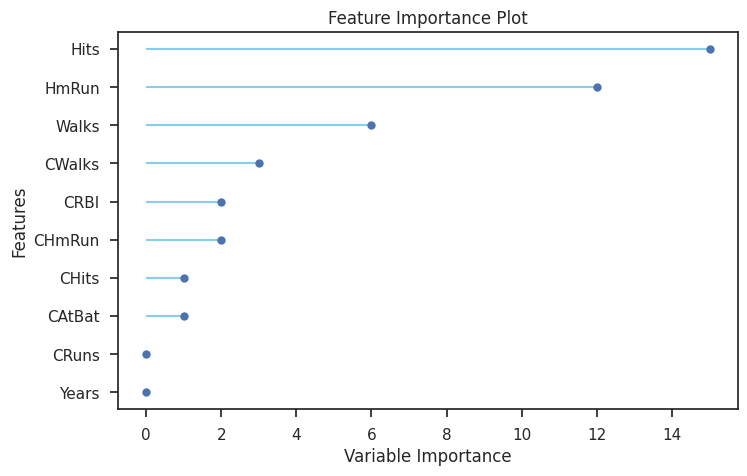

In [38]:
plot_model(boosting,plot = "feature")

**Observação sobre Lasso e Ridge (Modelos Paramétricos)** \
>Decidimos utilizar o tune_model para verificar se conseguiriamos resultados melhores que na primeira regressão a qual usamos outro codigo para cross-validation e para nossa surpresa conseguimos resultados melhores com o modelo de Ridge e similares com o modelo de Lasso.






Lasso

In [39]:
lasso = create_model("lasso")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7558,0.7202,0.8486,-0.0377,0.5828,0.9997
1,0.9496,1.4194,1.1914,-0.0361,0.6717,1.0711
2,0.7015,0.8254,0.9085,-0.2967,0.5263,0.8413
3,0.8593,1.1684,1.0809,-0.1840,0.6267,1.0512
4,0.7769,0.8823,0.9393,-0.0918,0.5942,0.9605
5,1.0525,1.6229,1.2739,-0.1563,0.6764,0.9857
6,0.8274,1.0139,1.0069,-0.0198,0.6349,0.9979
7,0.8298,1.0707,1.0348,-0.0254,0.6390,0.9930
8,0.7989,0.9065,0.9521,-0.0098,0.6158,1.0226


In [40]:
lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2185,0.0810,0.2847,0.8832,0.1260,0.4965
1,0.2607,0.1058,0.3253,0.9228,0.1900,1.6841
2,0.3378,0.1495,0.3866,0.7652,0.1664,1.0603
3,0.2569,0.1259,0.3549,0.8724,0.1648,0.9589
4,0.3036,0.1507,0.3881,0.8136,0.1959,0.5305
5,0.2507,0.1058,0.3253,0.9246,0.1442,0.2617
6,0.2865,0.1272,0.3566,0.8721,0.1849,0.4515
7,0.3787,0.1995,0.4467,0.8089,0.2487,1.6490
8,0.4186,0.2650,0.5148,0.7047,0.2872,2.0017


In [41]:
lasso.get_params()

{'alpha': 0.12,
 'copy_X': True,
 'fit_intercept': False,
 'max_iter': 1000,
 'normalize': True,
 'positive': False,
 'precompute': False,
 'random_state': 333,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Ridge

In [42]:
ridge = create_model("ridge")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1798,0.0486,0.2205,0.9299,0.1285,0.3817
1,0.2281,0.0733,0.2708,0.9465,0.1626,1.8215
2,0.3389,0.1412,0.3757,0.7782,0.1985,1.7263
3,0.2024,0.0789,0.2809,0.9200,0.1421,1.0156
4,0.2740,0.1182,0.3438,0.8537,0.1629,0.8601
5,0.2736,0.1039,0.3223,0.9260,0.1618,0.4196
6,0.1907,0.0596,0.2441,0.9400,0.1258,0.4267
7,0.3143,0.1250,0.3535,0.8803,0.2231,2.5743
8,0.3523,0.2078,0.4559,0.7685,0.2632,2.5664


In [43]:
ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2058,0.0610,0.2470,0.9121,0.1390,0.4134
1,0.2374,0.0850,0.2916,0.9379,0.1711,1.7633
2,0.3016,0.1295,0.3599,0.7966,0.1982,1.6290
3,0.1896,0.0687,0.2620,0.9304,0.1352,0.9672
4,0.2512,0.1001,0.3164,0.8761,0.1485,0.8572
5,0.2700,0.1028,0.3206,0.9268,0.1681,0.4443
6,0.1642,0.0463,0.2152,0.9534,0.1034,0.3523
7,0.3050,0.1235,0.3514,0.8818,0.2398,3.0843
8,0.3438,0.1865,0.4319,0.7922,0.2489,2.3466


In [44]:
ridge.get_params()

{'alpha': 0.12,
 'copy_X': True,
 'fit_intercept': False,
 'max_iter': None,
 'normalize': True,
 'random_state': 333,
 'solver': 'auto',
 'tol': 0.001}

**Análise de Resíduos**


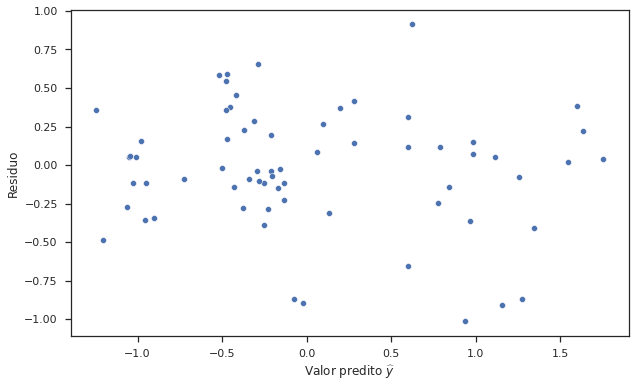

In [45]:
previsao = predict_model(rf,X_test)["Label"]
residuo = previsao - y_test
plt.figure(figsize = (10,6))
sns.scatterplot(x = previsao,y = residuo)
plt.xlabel("Valor predito $\widehat{y}$")
plt.ylabel("Residuo")
plt.show()

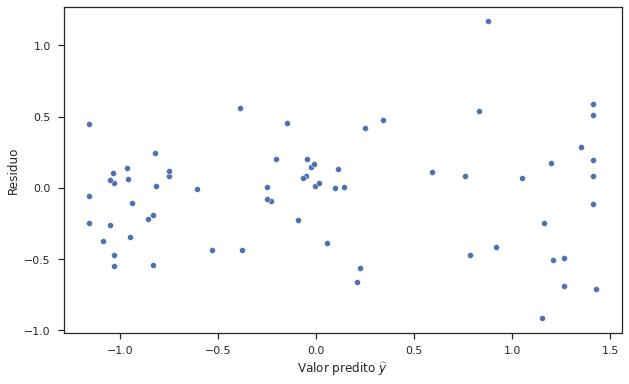

In [46]:
previsao = predict_model(boosting,X_test)["Label"]
residuo = previsao - y_test
plt.figure(figsize = (10,6))
sns.scatterplot(x = previsao,y = residuo)
plt.xlabel("Valor predito $\widehat{y}$")
plt.ylabel("Residuo")
plt.show()

# Resultados

Esses foram os resultados dessa análise, nesse caso para os resultados finais apenas o modelo de lasso, que foi melhor com a outra cross-validation terá seu resultado trocado.

In [47]:
modelos = [dtree,rf,boosting,lasso,ridge]
sigla = ["Decision Tree", "Random Forest", "LBoosting","Lasso","Ridge"]

for modelo,sigla in zip(modelos,sigla):
    ypred = predict_model(modelo,data = X_test)
    res_test = [mean_absolute_error(y_test, ypred["Label"]), mean_squared_error(y_test, ypred["Label"]),
                mean_squared_error(y_test, ypred["Label"], squared = False)]
    
    dic_results = {"teste":res_test}; DF = pd.DataFrame(dic_results).T; DF.columns = ["EAM",  "EQM","REQM"]
    print("Resultados modelo: {}".format(sigla))
    print(round(DF, 3), end = "\n\n")

Resultados modelo: Decision Tree
         EAM   EQM  REQM
teste  0.414  0.27  0.52

Resultados modelo: Random Forest
         EAM    EQM   REQM
teste  0.295  0.151  0.389

Resultados modelo: LBoosting
         EAM   EQM   REQM
teste  0.286  0.14  0.375

Resultados modelo: Lasso
         EAM    EQM   REQM
teste  0.272  0.133  0.365

Resultados modelo: Ridge
         EAM   EQM  REQM
teste  0.286  0.13  0.36

